In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch as th
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Avoid warnings
import warnings
warnings.filterwarnings("ignore")


# Obtain

In [27]:
#Use cuda if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")

In [28]:
df = pd.read_csv('./data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Scrub

In [29]:
# Keep the  mouth in Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df= df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6


<Axes: xlabel='RainTomorrow', ylabel='count'>

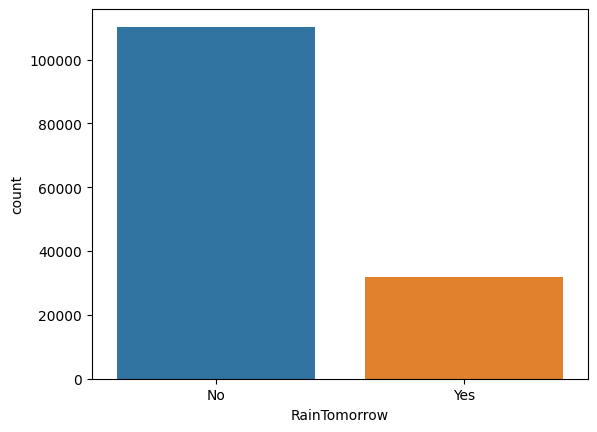

In [30]:
#plot target histogram
sns.countplot(x='RainTomorrow', data=df)

### Se eliminan los NA para no introducir incertidumbre 

In [31]:
#Mapping target variable
mapper = { 'Yes': 1, 'No': 0}
df['RainToday'] = df['RainToday'].map(mapper)
df['RainTomorrow'] = df['RainTomorrow'].map(mapper)
df_na = df.loc[df['RainTomorrow'].isna()]
df = df.loc[df['RainTomorrow'].notna()]

df_na

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,0.0,NaN,12
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,0.0,NaN,9
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,0.0,NaN,2
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,0.0,NaN,2
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,0.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,0.0,NaN,2
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,0.0,NaN,6
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN,6
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,0.0,NaN,2


In [32]:
#Catetorical columns
#Fill missing values with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,None,13.4,22.9,0.6,NaN,NaN,None,44.0,None,None,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,12
1,None,7.4,25.1,0.0,NaN,NaN,None,44.0,None,None,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,12
2,None,12.9,25.7,0.0,NaN,NaN,None,46.0,None,None,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,12
3,None,9.2,28.0,0.0,NaN,NaN,None,24.0,None,None,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,12
4,None,17.5,32.3,1.0,NaN,NaN,None,41.0,None,None,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,None,3.5,21.8,0.0,NaN,NaN,None,31.0,None,None,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0,6
145455,None,2.8,23.4,0.0,NaN,NaN,None,31.0,None,None,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0,6
145456,None,3.6,25.3,0.0,NaN,NaN,None,22.0,None,None,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0,6
145457,None,5.4,26.9,0.0,NaN,NaN,None,37.0,None,None,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0,6


In [33]:
#Change dtype of RainTomorrow to int
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

In [34]:
# Label encoding
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])
df
                                

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,0,13.4,22.9,0.6,NaN,NaN,0,44.0,0,0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,12
1,0,7.4,25.1,0.0,NaN,NaN,0,44.0,0,0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,12
2,0,12.9,25.7,0.0,NaN,NaN,0,46.0,0,0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,12
3,0,9.2,28.0,0.0,NaN,NaN,0,24.0,0,0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,12
4,0,17.5,32.3,1.0,NaN,NaN,0,41.0,0,0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,3.5,21.8,0.0,NaN,NaN,0,31.0,0,0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0,6
145455,0,2.8,23.4,0.0,NaN,NaN,0,31.0,0,0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0,6
145456,0,3.6,25.3,0.0,NaN,NaN,0,22.0,0,0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0,6
145457,0,5.4,26.9,0.0,NaN,NaN,0,37.0,0,0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0,6


In [35]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,142193.0,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,142193.0,132923.000000,142193.0,142193.0,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787.000000,142193.000000,142193.000000
mean,0.0,12.186400,23.226784,2.349974,5.469824,7.624853,0.0,39.984292,0.0,0.0,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.223423,0.224181,6.402544
std,0.0,6.403283,7.117618,8.465173,4.188537,3.781525,0.0,13.588801,0.0,0.0,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.416541,0.417043,3.426506
min,0.0,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.0,6.000000,0.0,0.0,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000
25%,0.0,7.600000,17.900000,0.000000,2.600000,4.900000,0.0,31.000000,0.0,0.0,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,3.000000
50%,0.0,12.000000,22.600000,0.000000,4.800000,8.500000,0.0,39.000000,0.0,0.0,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,6.000000
75%,0.0,16.800000,28.200000,0.800000,7.400000,10.600000,0.0,48.000000,0.0,0.0,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000,9.000000
max,0.0,33.900000,48.100000,371.000000,145.000000,14.500000,0.0,135.000000,0.0,0.0,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,12.000000


In [36]:
# Numerical columns
# Fill missing values with the mean
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())


# Explore

<Axes: xlabel='RainTomorrow', ylabel='count'>

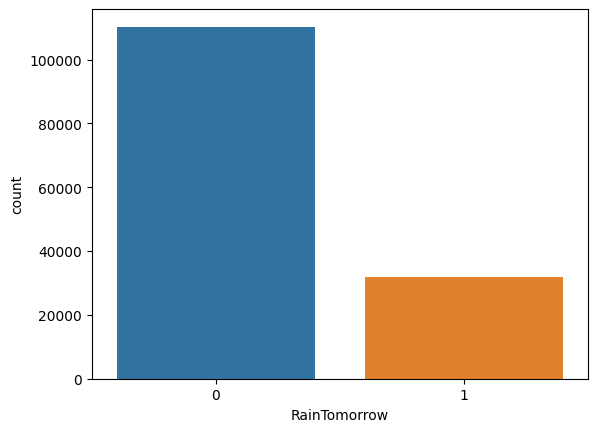

In [37]:
#plot target histogram
sns.countplot(x='RainTomorrow', data=df)

#### Se presenta outliers en la feature "Evaporacion"

<Axes: xlabel='Evaporation', ylabel='count'>

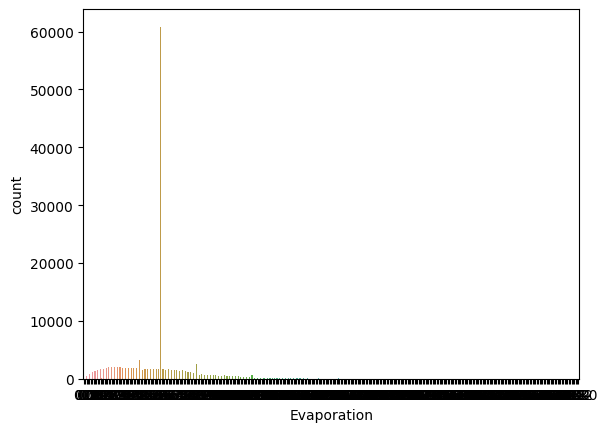

In [38]:
# Using seaborn to plot the instances of Evaporation
sns.countplot(x='Evaporation', data=df)


[(0.0, 10000.0)]

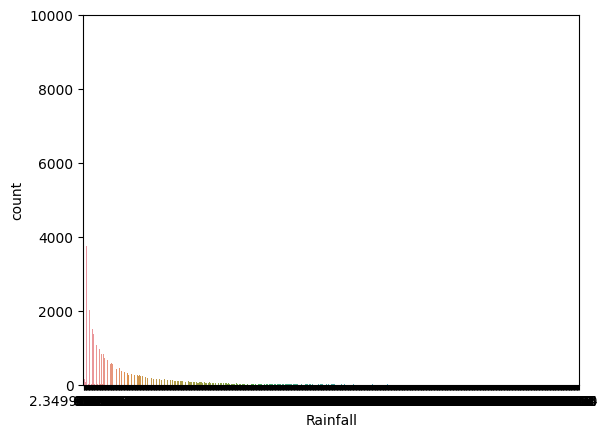

In [39]:
# Plot instances of rainfall
plot = sns.countplot(x='Rainfall', data=df )
plot.set(ylim=(0, 10000))

<Axes: xlabel='WindGustSpeed', ylabel='count'>

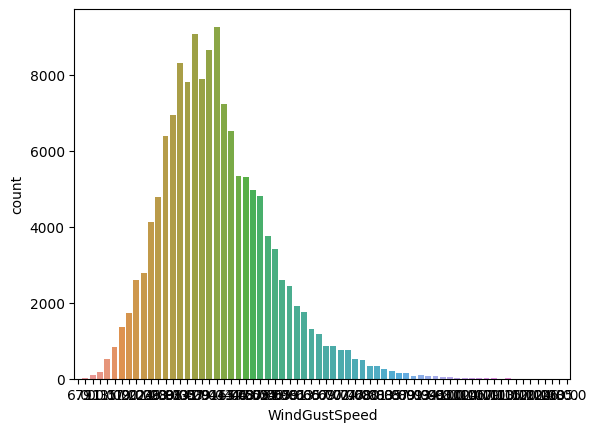

In [40]:
sns.countplot(x='WindGustSpeed', data=df)

<Axes: xlabel='Humidity3pm', ylabel='count'>

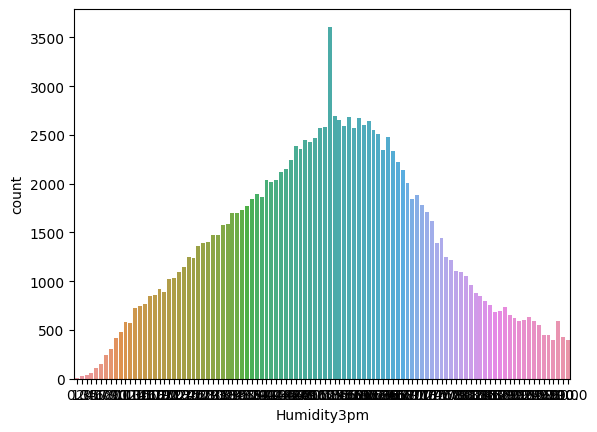

In [41]:
sns.countplot(x='Humidity3pm', data=df)

In [42]:
Q1 = df['Evaporation'].quantile(0.25)
Q3 = df['Evaporation'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df['Evaporation'] < (Q1 - 1.5 * IQR)) | (df['Evaporation'] > (Q3 + 1.5 * IQR)))]

In [43]:
#Drop outliers
df = df[~((df['Evaporation'] < (Q1 - 1.5 * IQR)) | (df['Evaporation'] > (Q3 + 1.5 * IQR)))]

<Axes: xlabel='Evaporation', ylabel='count'>

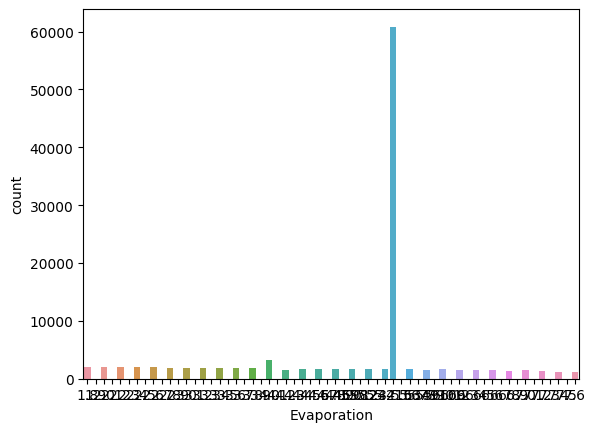

In [44]:
sns.countplot(x='Evaporation', data=df)

In [45]:
#standardize the data
# scaler = StandardScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df


<Axes: >

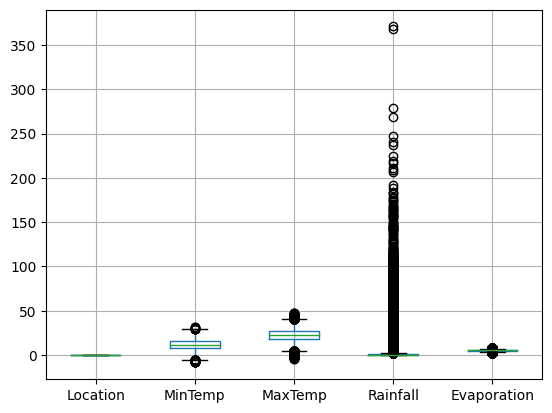

In [46]:
#Boxplot of 10 first columns
df.iloc[:, 0:5].boxplot()

### Drop Rainfall 

In [47]:
#Drop Rainfall column
df = df.drop(columns=['Rainfall'])
df

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,0,13.4,22.9,5.469824,7.624853,0,44.0,0,0,20.0,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0.0,0,12
1,0,7.4,25.1,5.469824,7.624853,0,44.0,0,0,4.0,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0.0,0,12
2,0,12.9,25.7,5.469824,7.624853,0,46.0,0,0,19.0,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0.0,0,12
3,0,9.2,28.0,5.469824,7.624853,0,24.0,0,0,11.0,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0.0,0,12
4,0,17.5,32.3,5.469824,7.624853,0,41.0,0,0,7.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,3.5,21.8,5.469824,7.624853,0,31.0,0,0,15.0,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0.0,0,6
145455,0,2.8,23.4,5.469824,7.624853,0,31.0,0,0,13.0,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0.0,0,6
145456,0,3.6,25.3,5.469824,7.624853,0,22.0,0,0,13.0,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0.0,0,6
145457,0,5.4,26.9,5.469824,7.624853,0,37.0,0,0,9.0,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0.0,0,6


### Split

In [48]:
#Split the dataset in train, test

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['RainTomorrow']), df['RainTomorrow'], test_size=0.2, random_state=42)
X_train.shape

(90406, 21)

# Model

#### Modelo

In [49]:
#ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(21, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x= self.dropout(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x


#### Entrenamiento

In [50]:
#training parameters
epochs = 150
batch_size = 32
validation_split = 0.2

model = ANN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00009)


dataset_size = len(X_train)
indices = list(range(dataset_size))
split = int(validation_split * dataset_size)


train_indices, val_indices = indices[split:], indices[:split]


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    #Training
    model.train()
    epoch_train_loss = 0
    epoch_train_correct = 0
    epoch_train_total = 0
    
    for i in range(0, len(train_indices), batch_size):
        batch_indices = train_indices[i:i+batch_size]
        X_batch = th.tensor(X_train.iloc[batch_indices].values, dtype=th.float).to(device)
        y_batch = th.tensor(y_train.iloc[batch_indices].values, dtype=th.float).to(device)
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()
        epoch_train_correct += ((y_pred > 0.5).float() == y_batch.unsqueeze(1)).sum().item()
        epoch_train_total += y_batch.size(0)
    
    train_losses.append(epoch_train_loss / len(train_indices))
    train_accuracies.append(epoch_train_correct / epoch_train_total)
    # Evaluation
    model.eval()
    epoch_val_loss = 0
    epoch_val_correct = 0
    epoch_val_total = 0
    
    with th.no_grad():
        for i in range(0, len(val_indices), batch_size):
            batch_indices = val_indices[i:i+batch_size]
            X_batch = th.tensor(X_train.iloc[batch_indices].values, dtype=th.float).to(device)
            y_batch = th.tensor(y_train.iloc[batch_indices].values, dtype=th.float).to(device)
            
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            
            epoch_val_loss += loss.item()
            epoch_val_correct += ((y_pred > 0.5).float() == y_batch.unsqueeze(1)).sum().item()
            epoch_val_total += y_batch.size(0)
    
    val_losses.append(epoch_val_loss / len(val_indices))
    val_accuracies.append(epoch_val_correct / epoch_val_total)

    
    
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Train Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}, Train Acc: {train_accuracies[-1]}, Val Acc: {val_accuracies[-1]}')

    if epoch > 20 and epoch_train_loss > previous_epoch_loss - 0.001:
        model.load_state_dict(best_model_state)
        print(f'Early stopping at epoch {epoch}')
        break
    else:
        best_model_state = model.state_dict()
        previous_epoch_loss = epoch_train_loss    


Epoch: 0, Train Loss: 0.017022052186811996, Val Loss: 0.01465149674688014, Train Acc: 0.7721396474248186, Val Acc: 0.7848570322437918
Epoch: 10, Train Loss: 0.013283542362909352, Val Loss: 0.012227000479609241, Train Acc: 0.812319391634981, Val Acc: 0.8298213594380842
Epoch: 20, Train Loss: 0.013167335054390661, Val Loss: 0.012195133848413416, Train Acc: 0.8135776011061182, Val Acc: 0.8300425861401471
Early stopping at epoch 21


In [59]:
#save the model
th.save(model.state_dict(), 'model.pth')

## Interpret 

In [51]:
def plot_metrics(train_values, val_values, metric_name):
    plt.figure(figsize=(10, 5))
    plt.plot(train_values, label=f'Train {metric_name}')
    plt.plot(val_values, label=f'Validation {metric_name}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()
    plt.title(f'Training and Validation {metric_name}')
    plt.show()

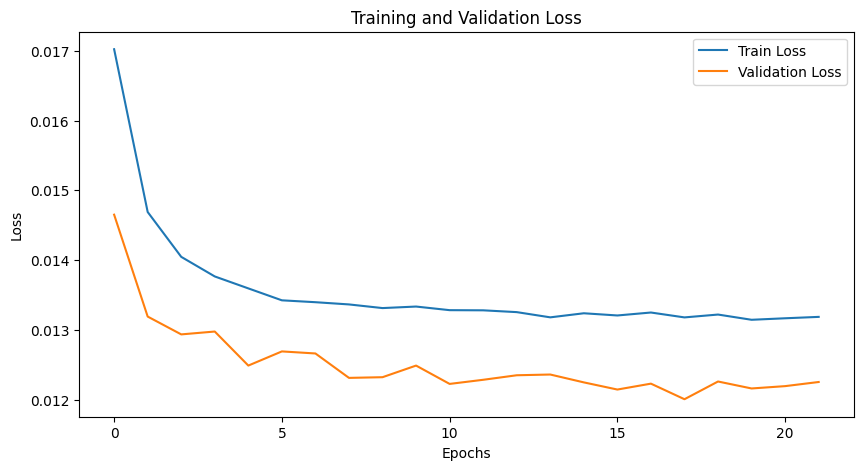

In [52]:
plot_metrics(train_losses, val_losses, 'Loss')

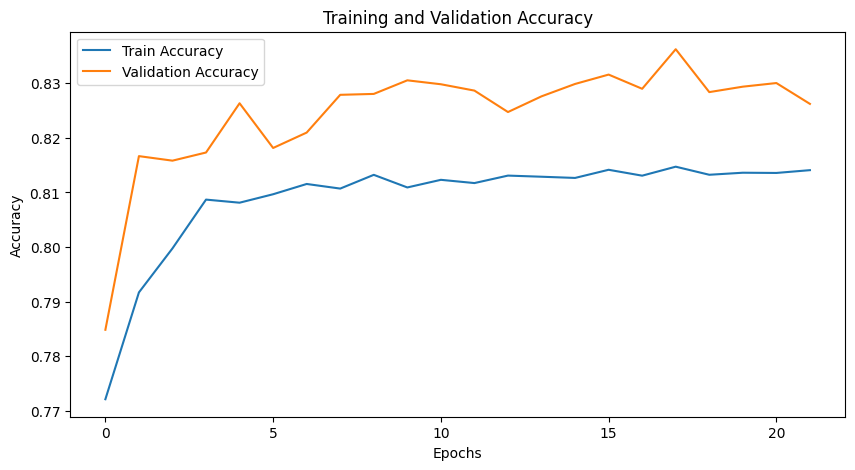

In [53]:
plot_metrics(train_accuracies, val_accuracies, 'Accuracy')

In [54]:
# Predicting the test set results
model.eval()
with th.no_grad():
    y_pred = model(th.tensor(X_test.values, dtype=th.float).to(device)).cpu().numpy()

y_pred = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8224935846385275


<Axes: title={'center': 'Confusion Matrix'}>

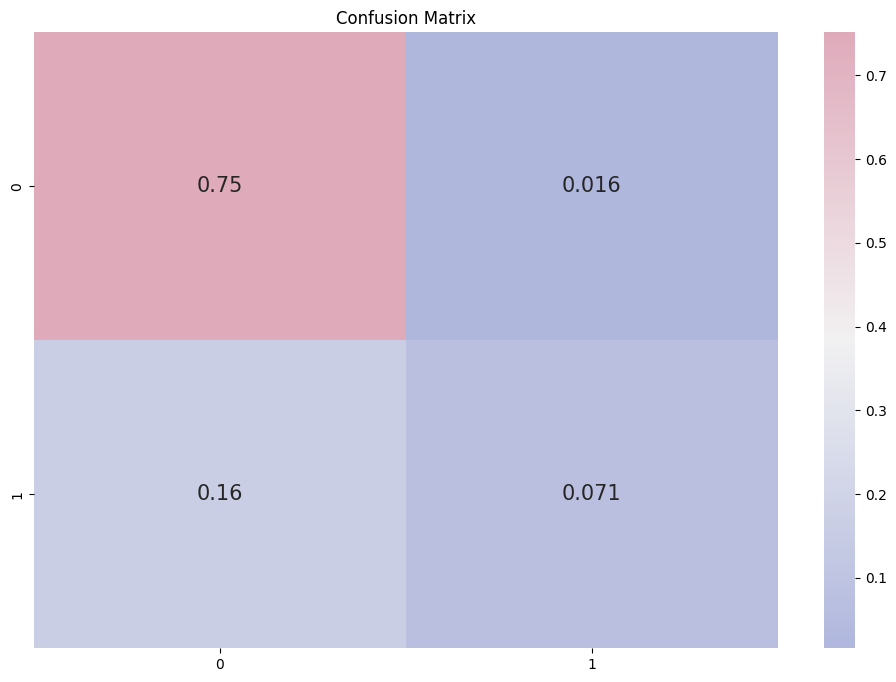

In [55]:
# Confusion matrix using seaborn
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
plt.title('Confusion Matrix')
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap, annot = True, annot_kws = {'size':15})

In [56]:
# Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     17339
           1       0.82      0.31      0.44      5263

    accuracy                           0.82     22602
   macro avg       0.82      0.64      0.67     22602
weighted avg       0.82      0.82      0.79     22602



In [57]:
#Random instance to predict
random_instance = X_test.sample()
random_instance

model.eval()
with th.no_grad():
    y_pred = model(th.tensor(random_instance.values, dtype=th.float).to(device)).cpu().numpy()

y_pred = (y_pred > 0.5).astype(int)
y_pred

#Check the real value
y_test.loc[random_instance.index]

#Compare the real value with the predicted value
random_instance['RainTomorrowPred'] = y_pred
random_instance['RainTomorrow'] = y_test.loc[random_instance.index].values
random_instance['RainTomorrowPred'] = random_instance['RainTomorrowPred'].map({0: 'No', 1: 'Yes'})
random_instance['RainTomorrow'] = random_instance['RainTomorrow'].map({0: 'No', 1: 'Yes'})
random_instance

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,RainTomorrowPred,RainTomorrow
134122,0,8.2,25.6,5.469824,7.624853,0,31.0,0,0,2.0,...,1011.1,1009.5,4.437189,4.503167,15.1,23.4,0.0,12,No,No


In [65]:
#Test the model with a new instance
loction = 'Albury'
min_temp = 10
max_temp = 20
evaporation = 5
sunshine = 7
wind_gust_dir = 'NE'
wind_gust_speed = 35
wind_dir9am = 'E'
wind_dir3pm = 'NW'
wind_speed9am = 15
wind_speed3pm = 20
humidity9am = 60
humidity3pm = 50
pressure9am = 1000
pressure3pm = 1002
cloud9am = 5
cloud3pm = 5
temp9am = 15
temp3pm = 18
rain_today = 'No'
month = 3

# Create a new instance
test_instance = pd.DataFrame({'Location': [loction], 'MinTemp': [min_temp], 'MaxTemp': [max_temp], 'Evaporation': [evaporation], 'Sunshine': [sunshine], 'WindGustDir': [wind_gust_dir], 'WindGustSpeed': [wind_gust_speed], 'WindDir9am': [wind_dir9am], 'WindDir3pm': [wind_dir3pm], 'WindSpeed9am': [wind_speed9am], 'WindSpeed3pm': [wind_speed3pm], 'Humidity9am': [humidity9am], 'Humidity3pm': [humidity3pm], 'Pressure9am': [pressure9am], 'Pressure3pm': [pressure3pm], 'Cloud9am': [cloud9am], 'Cloud3pm': [cloud3pm], 'Temp9am': [temp9am], 'Temp3pm': [temp3pm], 'RainToday': [rain_today], 'Month': [month]})

# Label encoding
for col in test_instance.columns:
    if test_instance[col].dtype == 'object':
        test_instance[col] = label.fit_transform(test_instance[col])

# Predict
model.eval()
with th.no_grad():
    y_pred = model(th.tensor(test_instance.values, dtype=th.float).to(device)).cpu().numpy()

y_pred = (y_pred > 0.5).astype(int)

if y_pred[0] == 0:
    print('The model predicts that it will NOT rain tomorrow')
else:
    print('The model predicts that it will rain tomorrow')

The model predicts that it will not rain tomorrow
